# Machine Learning Regression Model
## By Juan Manuel Franco Islas

## Import libraries

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import VotingRegressor
import seaborn as sns
%matplotlib inline

In [3]:
df_main = pd.read_csv('../../to_model.csv')

In [5]:
df_main.drop(['job_offer_id'], axis=1, inplace=True)

In [6]:
df_main.head(5)

,salary,category_accountancy qualified jobs,category_admin secretarial pa jobs,category_apprenticeships jobs,category_banking jobs,category_catering jobs,category_charity jobs,category_construction property jobs,category_customer service jobs,category_education jobs,...,category_strategy consultancy jobs,category_training jobs,"job_type_Contract, full-time or part-time","job_type_Contract, part-time","job_type_Permanent, full-time","job_type_Permanent, full-time or part-time","job_type_Permanent, part-time","job_type_Temporary, full-time","job_type_Temporary, full-time or part-time","job_type_Temporary, part-time"
0,18323.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,41000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
y = df_main['salary']
X = df_main.drop(['salary'], axis=1)

In [32]:
X.columns

Index(['category_accountancy qualified jobs',
       'category_admin secretarial pa jobs', 'category_apprenticeships jobs',
       'category_banking jobs', 'category_catering jobs',
       'category_charity jobs', 'category_construction property jobs',
       'category_customer service jobs', 'category_education jobs',
       'category_energy jobs', 'category_engineering jobs',
       'category_estate agent jobs', 'category_factory jobs',
       'category_finance jobs', 'category_fmcg jobs',
       'category_general insurance jobs',
       'category_graduate training internships jobs', 'category_health jobs',
       'category_hr jobs', 'category_it jobs', 'category_law jobs',
       'category_leisure tourism jobs', 'category_logistics jobs',
       'category_marketing jobs', 'category_media digital creative jobs',
       'category_motoring automotive jobs', 'category_other jobs',
       'category_purchasing jobs', 'category_recruitment consultancy jobs',
       'category_retail jobs', 

### relevance of the features

Now I am going to use some technics to check the relevance of the features.

### 1.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [13]:
model = Lasso()
model.fit(X_train,y_train)

Lasso()

In [14]:
model.score(X_test, y_test)

0.1120995622571398

In [15]:
model.coef_

array([ 22173.39618789,  -4028.31544407, -10540.44017792,  20666.15385553,
        -2454.60641835,   3477.23595819,  10795.49905993,  -4956.85932679,
         4976.86247033,   8977.71633225,   6552.9143358 ,   3449.93270956,
        -1700.48610325,  10811.92843674,   6441.66346478,   6281.82123532,
        -1590.57787202,  11898.35336743,   8027.44902366,  16343.12419609,
         8828.78006964,   -498.73137746,  -2303.56580307,   7264.45636368,
         7523.00506791,   1436.97270507,  -1327.07155955,   8317.25997527,
         9359.07243795,   1059.60753636,   4856.57986014,   7101.62431424,
        -2180.7310674 ,   3096.38355354,  20069.18209623,   3230.73284462,
          181.54325349,  -3570.16962788,   -775.8022877 ,  -7391.39113057,
        -9707.10854858,  -2281.9865559 ,  -5185.1657507 ,  -3788.72694406])

In [16]:
var = np.floor(np.log10(np.abs(model.coef_)))

In [21]:
var

array([4., 3., 4., 4., 3., 3., 4., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3.,
       4., 3., 4., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       4., 3., 2., 3., 2., 3., 3., 3., 3., 3.])

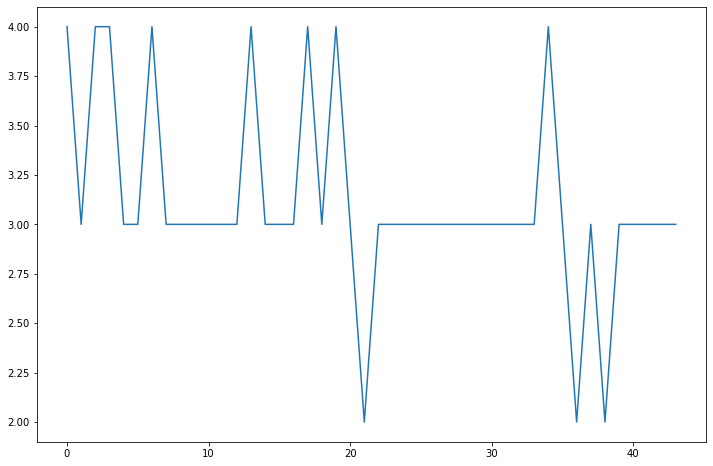

In [22]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)

We coul see how there are 3 features that have low scores 22 'category_leisure tourism jobs', 37 'job_type_Contract, full-time or part-time' , and 39 'job_type_Permanent, full-time'

### 2.

In [23]:
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000023B82FB4940>)

In [24]:
scores = selector.scores_
scores

array([0.03239448, 0.02416776, 0.01118479, 0.01649156, 0.01835533,
       0.01854082, 0.01857174, 0.02743403, 0.02666827, 0.01089892,
       0.01345922, 0.00465118, 0.02331062, 0.0180841 , 0.01288176,
       0.00070006, 0.02184126, 0.09016512, 0.00300057, 0.02230882,
       0.00357762, 0.01143252, 0.02268803, 0.00697836, 0.00841662,
       0.01324016, 0.01508899, 0.00695194, 0.01082993, 0.01915396,
       0.01787004, 0.00191304, 0.01995519, 0.04265779, 0.00392841,
       0.        , 0.00901176, 0.00329221, 0.20168818, 0.00672382,
       0.03388081, 0.12432335, 0.00924101, 0.01930078])

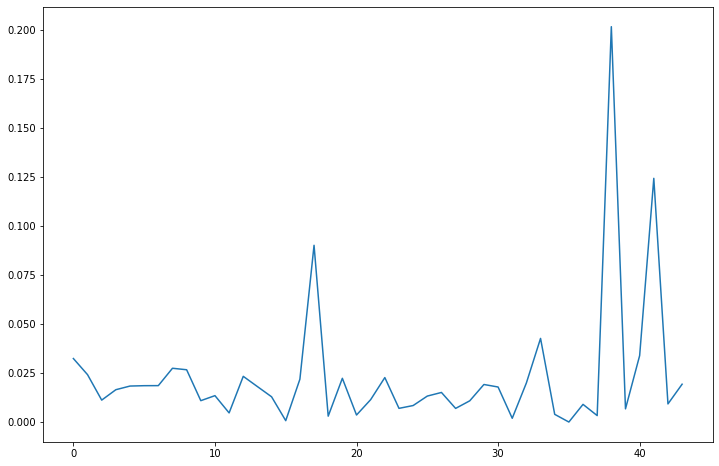

In [25]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)

We coul see how there are 2 features that have low scores 36 'category_training jobs' and 16 'category_general insurance jobs' 

### 3.

<AxesSubplot:>

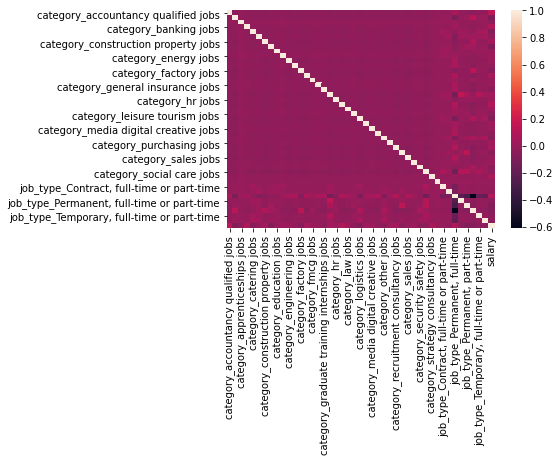

In [27]:
Z3 = pd.concat([X,y], axis=1)
sns.heatmap(Z3.corr())

Before drop all that useless features, I am going to do a check trainig the same model with diferent features.

In [38]:
cols4 = ['category_accountancy qualified jobs', 'category_apprenticeships jobs', 'category_banking jobs', 'category_construction property jobs', 'category_finance jobs','category_health jobs', 'category_it jobs', 'category_strategy consultancy jobs']

In [34]:
X2_train = X_train.drop(columns=[ 'category_leisure tourism jobs', 'job_type_Contract, full-time or part-time' , 'job_type_Permanent, full-time'])
X2_test = X_test.drop(columns=[ 'category_leisure tourism jobs', 'job_type_Contract, full-time or part-time' , 'job_type_Permanent, full-time'])
X3_train = X_train.drop(columns=[ 'category_leisure tourism jobs', 'job_type_Contract, full-time or part-time' , 'job_type_Permanent, full-time', 'category_training jobs', 'category_general insurance jobs'])
X3_test = X_test.drop(columns=[ 'category_leisure tourism jobs', 'job_type_Contract, full-time or part-time' , 'job_type_Permanent, full-time', 'category_training jobs', 'category_general insurance jobs'])

In [39]:
X4_train,X4_test = X_train[cols4], X_test[cols4]

In [40]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()
model4 = Lasso()
model1.fit(X_train,y_train)
model2.fit(X2_train,y_train)
model3.fit(X3_train,y_train)
model4.fit(X4_train, y_train)

Lasso()

In [41]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y_test))
print(model3.score(X3_test,y_test))
print(model4.score(X4_test,y_test))

0.1120995622571398
0.1118119370094327
0.11016271413647305
0.06508164857893506


As we can see the best score is with all the features fora that reason I am going to work with all the features.

## Moldes selection

### Random Forest Regressor

In [44]:
forest = RandomForestRegressor(200)
results = cross_validate(forest, X,y, cv=5, scoring='r2', return_train_score= True)
results

{'fit_time': array([16.13555956, 16.97085047, 15.29649067, 16.08419013, 15.19768548]),
 'score_time': array([0.21399784, 0.18179202, 0.2030735 , 0.14060855, 0.20496774]),
 'test_score': array([0.14617701, 0.08604533, 0.07009036, 0.11190023, 0.08700644]),
 'train_score': array([0.150573  , 0.16376181, 0.15725837, 0.16359299, 0.13921112])}

In [45]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.15487945832114378
0.10024387343247096


### Gradient Boosted Trees

In [47]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X,y, cv=5, scoring='r2', return_train_score= True)
results

{'fit_time': array([2.54637265, 2.51254845, 2.33706427, 2.39527202, 2.3976655 ]),
 'score_time': array([0.01303887, 0.02215862, 0.01565599, 0.01562214, 0.        ]),
 'test_score': array([0.114456  , 0.07767831, 0.08122095, 0.09265935, 0.06720796]),
 'train_score': array([0.12995847, 0.13984477, 0.13419156, 0.1373662 , 0.11374101])}

In [48]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.13102040344991742
0.08664451459043887


### Voting Regressor

In [51]:
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = ElasticNetCV()

In [52]:
ensemble = VotingRegressor(estimators=[('gb',reg1),('rf', reg2),('lr', reg3)])
results = cross_validate(ensemble, X,y, cv=5, scoring='r2', return_train_score= True)
results

{'fit_time': array([1.809093  , 0.73438716, 0.70277524, 0.70311666, 0.90138745]),
 'score_time': array([0.        , 0.01561975, 0.        , 0.01562524, 0.0254674 ]),
 'test_score': array([0.11895648, 0.07292203, 0.08853555, 0.07799149, 0.07400292]),
 'train_score': array([0.08517314, 0.09783703, 0.0918174 , 0.09395513, 0.09732983])}

In [53]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.09322250563986674
0.08648169271174957


As we can see all the models have low scores for that reason in the API I am going to use grid search to have a better score and do better predictions.